In [51]:
# imports
from scipy.io import loadmat
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt

### NOTE:
- ImCrop is the file that contains the tiles of the split image
- DeadEnd is the file that contains the segmentation masks

In [52]:
x = loadmat(r'C:\Users\vinic\code\lab-code\dead-ends\data\ImCrop.mat')

# Display variable names
print(x.keys())

dict_keys(['__header__', '__version__', '__globals__', 'Acrop', 'B1crop', 'B2crop', 'B3crop', 'B4crop'])


In [53]:
x['Acrop'][0][0][0].shape

(200, 200, 3)

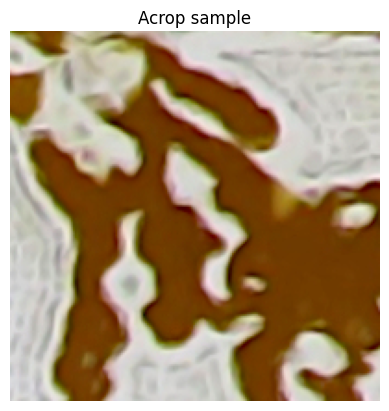

In [54]:
i = 1 # iterator place

img = np.array(x['Acrop'][0][i][0], dtype=np.float32)
img = img / np.max(img)  # Normalize interval
plt.imshow(img)
plt.title("Acrop sample")
plt.axis('off')
plt.show()

### Treat Nfig data

In [55]:
y = loadmat(r'C:\Users\vinic\code\lab-code\dead-ends\data\DeadEnd.mat')

# Display variable names
print(y.keys())

dict_keys(['__header__', '__version__', '__globals__', 'Anew', 'Nfig'])


In [56]:
arr = y['Nfig']
# int(arr[0][i][0].squeeze()) -- expression for acessing i nfig

In [57]:
fig_list = []

for i in range(0, 70):
    fig_list.append(int(arr[0][i][0].squeeze()))

fig_list.reverse()
fig_list[0]

578

In [58]:
# extract cummulative factor
for i in range(len(fig_list) - 1):
    fig_list[i] -= fig_list[i+1]

In [59]:
fig_list.reverse()

### Iterate over labels using `fig_list`

In [60]:
def maximize(mask):
    '''
    Convert label to 0-1 format
    '''

    # assert array has 3 dimensions
    if mask.ndim == 2:
        mask = np.expand_dims(mask, axis=-1)
        mask = np.repeat(mask, 3, axis=-1)

    c1 = mask[:, :, 0]
    c2 = mask[:, :, 1]
    c3 = mask[:, :, 2]

    out = c1 + c2 + c3
    out[out > 0] = 1
    return out

def sum_masks(m1, m2):
    return maximize(m1) + maximize(m2)


mask_sum = sum_masks(
    maximize(np.array(y['Anew'][0][4][0], dtype=np.float32)),
    maximize(np.array(y['Anew'][0][5][0], dtype=np.float32))
)


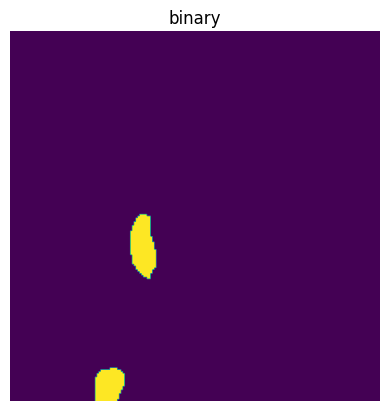

In [61]:
plt.imshow(mask_sum)
plt.title("binary")
plt.axis('off')
plt.show()

In [62]:
label_list = [] # store all np arrays in a list

j = 0
for img_range in fig_list:
    accumulate = np.zeros(shape=[200, 200, 3]) # reset accumulative mask
    i = 0
    while i < img_range:
        img = np.array(y['Anew'][0][j][0], dtype=np.float32)
        i += 1
        j += 1
        accumulate = sum_masks(accumulate, img) # accumulate mask over iterations
    label_list.append(accumulate) # store
        

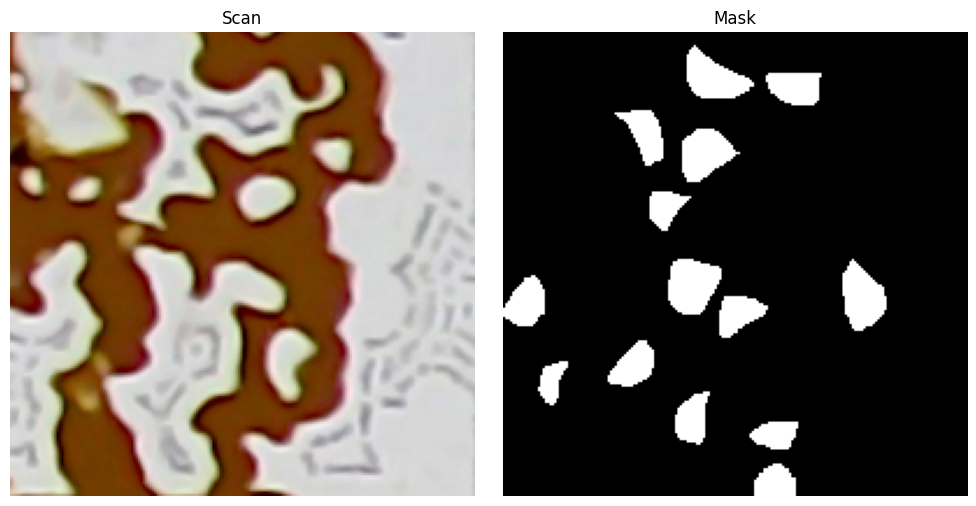

In [74]:
pos = 69

image1 = np.array(x['Acrop'][0][pos][0], dtype=np.float32)
image1 = image1 / np.max(image1)
image2 = label_list[pos]

fig, axes = plt.subplots(1, 2, figsize=(10, 5)) 

axes[0].imshow(image1, cmap='gray')
axes[0].set_title("Scan")
axes[0].axis('off')


axes[1].imshow(image2, cmap='gray')
axes[1].set_title("Mask")
axes[1].axis('off')

plt.tight_layout()
plt.show()


### store in folders

In [82]:
import os
from PIL import Image
import numpy as np

# Example setup
input_list = []
for i in range(70):
    img = np.array(x['Acrop'][0][i][0], dtype=np.float32)  # Example source
    img = img / np.max(img)  # Normalize to [0, 1]
    input_list.append(img)

# Paths
input_folder = r'C:\Users\vinic\code\lab-code\dead-ends\processed-data\input'
label_folder = r'C:\Users\vinic\code\lab-code\dead-ends\processed-data\label'

# Ensure input folder exists
os.makedirs(input_folder, exist_ok=True)

# Save input images
for i, img_array in enumerate(input_list):
    if img_array.ndim != 2:
        img_array = img_array.squeeze()
    img_array = (img_array * 255).astype(np.uint8)
    img = Image.fromarray(img_array)
    img.save(os.path.join(input_folder, f"{i + 1}.png"))

print(f"Saved {len(input_list)} images to '{input_folder}'")

os.makedirs(label_folder, exist_ok=True)
for i, img_array in enumerate(label_list):
    if img_array.ndim != 2:
        img_array = img_array.squeeze()
    img_array = (img_array * 255).astype(np.uint8)
    img = Image.fromarray(img_array)
    img.save(os.path.join(label_folder, f"{i + 1}.png"))

print(f"Saved {len(label_list)} images to '{label_folder}'")


Saved 70 images to 'C:\Users\vinic\code\lab-code\dead-ends\processed-data\input'
Saved 70 images to 'C:\Users\vinic\code\lab-code\dead-ends\processed-data\label'


(200, 200, 3)